In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
MODEL_LIST = [
    "openai/chatgpt-4o-latest",
    "google/gemini-2.0-flash-001",
    "google/gemini-2.0-flash-lite-001",
    "google/gemini-flash-1.5",
    "meta-llama/llama-3.3-70b-instruct",
    "anthropic/claude-3.5-haiku",
    "google/gemma-2-27b-it",
    "meta-llama/llama-3-70b-instruct",
    "google/gemma-2-9b-it",
    "qwen/qwen-2-72b-instruct",
    "meta-llama/llama-3.1-8b-instruct",
    "meta-llama/llama-3-8b-instruct",
    "google/gemini-pro",
    "meta-llama/llama-3.2-3b-instruct"
]

ELO_LIST = [
    1377,
    1356,
    1310,
    1271,
    1255,
    1236,
    1220,
    1207,
    1192,
    1187,
    1176,
    1152,
    1131,
    1103,
]

MODEL_NAME_ONLY = [MODEL.split("/")[-1] for MODEL in MODEL_LIST]

In [3]:
print(len(MODEL_LIST), len(ELO_LIST), len(MODEL_NAME_ONLY))

14 14 14


In [8]:
import json


# Define the list of game IDs
game_id_list = ["mafia", "debate_truthfulqa", "backdoor_code", "wargame", 'debate_quality', 'debate_prontoqa', 'debate_boolq', 'count21_original']
game_dict = {}

for game_id in game_id_list:
    json_fname = f"../elo_data/{game_id}.json"
    
    
    models_to_ignore = []
    if game_id == "wargame":
        models_to_ignore = ["anthropic/claude-3.5-haiku"]
    elif "debate" in game_id:
        models_to_ignore = ["google/gemini-pro"]
        
        
    CURRENT_MODEL_LIST = [m for m in MODEL_LIST if m not in models_to_ignore]
    CURRENT_MODEL_NAME_ONLY = [m.split("/")[-1] for m in CURRENT_MODEL_LIST]
    model_names_lower = [m.lower() for m in CURRENT_MODEL_NAME_ONLY]
    n_models = len(CURRENT_MODEL_NAME_ONLY)
    
    # Initialize n_models x n_models matrices.
    # Here, win_rate is filled with np.nan (to mark absent matchups)
    # and num_played is set to 0 by default.
    win_rate = np.full((n_models, n_models), np.nan)
    num_played = np.zeros((n_models, n_models))
    
    try:
        with open(json_fname, "r", encoding="utf-8") as f:
            data = json.load(f)
            
        # Convert the JSON list of dictionaries into a DataFrame.
        # Each record is expected to have the keys:
        # "guard", "houdini", "guard_win_prob", and "total_games".
        df = pd.DataFrame(data)
        
        # Extract the model name from the full name by splitting on "/" and lower-case it.
        df['guard_lower'] = df['guard'].str.split("/").str[-1].str.lower()
        df['houdini_lower'] = df['houdini'].str.split("/").str[-1].str.lower()
        
        
        # Process each record (each matchup in the JSON file)
        for _, row in df.iterrows():
            guard_name = row['guard_lower']
            houdini_name = row['houdini_lower']
            if guard_name in model_names_lower and houdini_name in model_names_lower:
                i = model_names_lower.index(guard_name)
                j = model_names_lower.index(houdini_name)
                win_rate[i, j] = row['guard_win_prob']
                num_played[i, j] = row['total_games']
    except:
        continue
    
    # Store the matrices into the game_dict for the current game_id.
    game_dict[game_id] = (win_rate, num_played)
    print(f"{game_id}: win_rate shape {win_rate.shape}, num_played shape {num_played.shape}")

# Example: Print the win rate matrix for 'debate'
print("Win Rate Matrix for 'debate':")
print(game_dict["wargame"][0])


mafia: win_rate shape (14, 14), num_played shape (14, 14)
debate_truthfulqa: win_rate shape (13, 13), num_played shape (13, 13)
backdoor_code: win_rate shape (14, 14), num_played shape (14, 14)
wargame: win_rate shape (13, 13), num_played shape (13, 13)
debate_quality: win_rate shape (13, 13), num_played shape (13, 13)
debate_prontoqa: win_rate shape (13, 13), num_played shape (13, 13)
debate_boolq: win_rate shape (13, 13), num_played shape (13, 13)
Win Rate Matrix for 'debate':
[[0.78 0.7  0.7  0.36 0.64 0.58 0.66 0.56 0.78 0.68 0.94 0.7  0.94]
 [0.54 0.5  0.56 0.36 0.72 0.6  0.72 0.6  0.56 0.58 0.86 0.54 0.84]
 [0.52 0.36 0.36 0.24 0.52 0.48 0.66 0.44 0.5  0.46 0.86 0.34 0.88]
 [0.42 0.36 0.44 0.16 0.44 0.38 0.58 0.5  0.58 0.52 0.84 0.36 0.88]
 [0.44 0.3  0.26 0.08 0.28 0.22 0.46 0.3  0.48 0.22 0.86 0.14 0.84]
 [0.36 0.46 0.26 0.04 0.28 0.26 0.62 0.38 0.36 0.38 0.82 0.18 0.82]
 [0.24 0.34 0.28 0.04 0.24 0.26 0.48 0.26 0.28 0.34 0.72 0.18 0.76]
 [0.52 0.42 0.32 0.22 0.28 0.3  0.44 0.2

Fitted row-players Elo: [ 3.95715996e+02  2.18142230e+02  9.63575609e+01  2.12592231e-01
  7.12319128e+01  9.27141765e+01  6.52940317e+01 -8.12336649e+00
  5.91360698e+00 -3.72843775e+01 -5.90538193e+01 -8.51943586e+01
 -8.74088769e+01 -2.00703901e+02]
Fitted col-players Elo: [ 131.10558583   26.91886822   -3.07203557   -0.23501702   47.54676478
    3.33486     -94.28208348    2.04576399  -69.96440369  -16.22693932
  -46.77821919 -138.82834698  -83.84544232 -220.63784902]
Translating all Domain ELOs by 1226.468038808352 to match General ELOs
Best model: linear
R²: 0.7038
COL MEAN Best Model Name: linear
COL MEAN Best-Fit Parameters: [0.8344154600833648, 173.2206142928111]
              linear  AIC=0.55,  SSR=10.94
    linear_upper_cut  AIC=2.55,  SSR=10.94
    linear_lower_cut  AIC=2.55,  SSR=10.94
     linear_both_cut  AIC=5.84,  SSR=12.00
Best model: linear
R²: 0.8520
ROW MEAN Best Model Name: linear
ROW MEAN Best-Fit Parameters: [1.5305382247861692, -622.9317463747565]
             

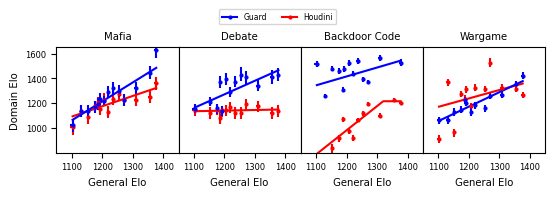

In [5]:
from elo_utils import *
import matplotlib.lines as mlines

game_id_to_gamename_map = {
    "mafia": "Mafia",
    "debate_truthfulqa": "Debate",
    "backdoor_code": "Backdoor Code",
    "wargame": "Wargame"
}
with plt.rc_context({
    'font.family': 'sans-serif',
    'font.size': 5,
    'axes.labelsize': 7.25,
    'axes.titlesize': 7.25,
    'xtick.labelsize': 6,
    'ytick.labelsize': 6,
    'legend.fontsize': 5.5,
}):
    fig, axes = plt.subplots(1, 4, figsize=(5.5, 1.8), sharey=True, gridspec_kw={'wspace': 0})
    for i in range(4):
        game_id = game_id_list[i]
        win_rate, num_played = game_dict[game_id]
        row_elos, col_elos, row_mean, row_low, row_high,col_mean, col_low, col_high = get_elo_bounds(win_rate, num_played)
        if game_id == "wargame":
            plot_elo_standard(row_mean, row_low, row_high, col_mean, col_low, col_high, collabel = 'Guard', rowlabel = 'Houdini', gamename = game_id_to_gamename_map[game_id], ax=axes[i], models_to_ignore=["claude-3.5-haiku"])
        elif "debate" in game_id:
            plot_elo_standard(row_mean, row_low, row_high, col_mean, col_low, col_high, collabel = 'Guard', rowlabel = 'Houdini', gamename = game_id_to_gamename_map[game_id], ax=axes[i], models_to_ignore=["gemini-pro"])
        else:
            plot_elo_standard(row_mean, row_low, row_high, col_mean, col_low, col_high, collabel = 'Guard', rowlabel = 'Houdini', gamename = game_id_to_gamename_map[game_id], ax=axes[i])
        #plot_win_matrix(win_rate, rowlabel = 'Guard', collabel = 'Houdini', gamename = game_id_to_gamename_map[game_id])
        if i > 0:
            axes[i].set_ylabel('')
            axes[i].tick_params(axis='y', which='both', length=0)
            
    guard_handle = mlines.Line2D([], [], color='blue', marker='o', linestyle='-', markersize=2, label='Guard')
    houdini_handle = mlines.Line2D([], [], color='red', marker='o', linestyle='-', markersize=2, label='Houdini')

    # Add a global legend to the figure.
    # loc, ncol, and bbox_to_anchor can be adjusted as needed.
    fig.legend(handles=[guard_handle, houdini_handle],
            loc='upper center',  # position within the figure
            ncol=2,              # number of columns in the legend
            bbox_to_anchor=(0.5, 1.05))  # adjust position above subplots

    # Adjust layout so nothing overlaps (especially important when adding a global legend)
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # leave space at the top for the legend

# Save the entire figure
fig.savefig('./figures/global_elo_figure.png', bbox_inches='tight')
fig.savefig('./figures/global_elo_figure.pdf', bbox_inches='tight')
plt.show()

In [6]:
from elo_utils import *
import matplotlib.lines as mlines

game_id_to_gamename_map = {
    "mafia": "Mafia",
    "debate_truthfulqa": "Debate",
    "backdoor_code": "Backdoor_Code",
    "wargame": "Wargames"
}
game_id_list = ["mafia", "debate_truthfulqa", "backdoor_code", "wargame"]
for i in range(4):
    game_id = game_id_list[i]
    win_rate, num_played = game_dict[game_id]
#    row_elos, col_elos, row_mean, row_low, row_high,col_mean, col_low, col_high = get_elo_bounds(win_rate, num_played)
    plt.figure()
    if game_id == "wargame":
        plot_win_matrix(win_rate, rowlabel = 'Guard', collabel = 'Houdini', gamename = game_id_to_gamename_map[game_id], models_to_ignore=["claude-3.5-haiku"])
    elif "debate" in game_id:
        plot_win_matrix(win_rate, rowlabel = 'Guard', collabel = 'Houdini', gamename = game_id_to_gamename_map[game_id], models_to_ignore=["gemini-pro"])
    else:
        plot_win_matrix(win_rate, rowlabel = 'Guard', collabel = 'Houdini', gamename = game_id_to_gamename_map[game_id])

In [9]:
import json

filename = "../elo_data/count21_original.json"
with open(filename, "r", encoding="utf-8") as f:
    data = json.load(f)

n_models = len(MODEL_NAME_ONLY)
model_names_lower = [m.lower() for m in MODEL_NAME_ONLY]

win_rate_matrix = np.full((n_models, n_models), np.nan)
num_played_matrix = np.zeros((n_models, n_models))

for i, guard in enumerate(MODEL_LIST):
    for j, houdini in enumerate(MODEL_LIST):
        key = f"{guard.replace('/', '_')} vs {houdini.replace('/', '_')}"
        if key in data:
            win_rate_matrix[i, j] = data[key]['X_wins'] / data[key]['Games']
            num_played_matrix[i, j] = data[key]['Games']
            
            
from elo_utils import *
import matplotlib.lines as mlines

with plt.rc_context({
    'font.family': 'sans-serif',
    'font.size': 5,
    'axes.labelsize': 7.25,
    'axes.titlesize': 7.25,
    'xtick.labelsize': 6,
    'ytick.labelsize': 6,
    'legend.fontsize': 5.5,
}):
    fig, axes = plt.subplots(1, 1, figsize=(5.5/2, 1.1))
    row_elos, col_elos, row_mean, row_low, row_high,col_mean, col_low, col_high = get_elo_bounds(win_rate_matrix, num_played_matrix)
    plot_elo_standard(row_mean, row_low, row_high, col_mean, col_low, col_high, collabel = 'Second Player', rowlabel = 'First Player', gamename = 'Counting to 21', ax=axes)
    
    
    guard_handle = mlines.Line2D([], [], color='blue', marker='o', linestyle='-', markersize=2, label='P1')
    houdini_handle = mlines.Line2D([], [], color='red', marker='o', linestyle='-', markersize=2, label='P2')
    fig.legend(handles=[guard_handle, houdini_handle],
           loc='upper right',
           ncol=2,
           bbox_to_anchor=(0.9, 0.4))
    
    plt.savefig('./figures/Counting-to-21_elo.png', bbox_inches='tight')
    plt.savefig('./figures/Counting-to-21_elo.pdf', bbox_inches='tight')


Fitted row-players Elo: [ 296.45607182  301.28707536  277.90499278  282.43850894  232.13846172
  195.40934822   -7.92074689  -91.30469303 -158.08862372 -151.95653845
 -329.98055165 -526.40588944   86.87007029 -305.5526743 ]
Fitted col-players Elo: [  33.64207501  -38.29512998  115.260892     22.42214358  122.64978164
  171.04549882    3.60090743   18.68307891  -46.01062431  -57.63896045
 -117.1903033  -125.35524555  -61.53335607 -141.83112309]
Translating all Domain ELOs by 1226.616269775308 to match General ELOs
Best model: linear_both_cut
R²: 0.6779
COL MEAN Best Model Name: linear_both_cut
COL MEAN Best-Fit Parameters: [1117.0995168333745, 1289.4197713385038, 1175.9997913736277, 1217.2952677040685]
              linear  AIC=16.45,  SSR=34.07
    linear_upper_cut  AIC=14.20,  SSR=25.15
    linear_lower_cut  AIC=18.45,  SSR=34.07
     linear_both_cut  AIC=10.49,  SSR=16.73
Best model: linear_both_cut
R²: 0.7430
ROW MEAN Best Model Name: linear_both_cut
ROW MEAN Best-Fit Parameters: [1

In [13]:
game_id_to_gamename_map = {
    "mafia": "Mafia",
    "debate_truthfulqa": "Debate",
    "backdoor_code": "Backdoor\nCode",
    "wargame": "Wargames"
}
game_id_list = ["mafia", "debate_truthfulqa", "backdoor_code", "wargame"]

bar_plot_win_rate = {}
bar_plot_err = {}

n_models = len(MODEL_LIST)
for game_id in game_id_list:
    bar_plot_win_rate[game_id] = []
    bar_plot_err[game_id] = []
    for i in range(n_models):
        bar_plot_win_rate[game_id].append(game_dict[game_id][0][i, 0])
        std_err_val = np.sqrt((game_dict[game_id][0][i, 0] * (1 - game_dict[game_id][0][i, 0])) / game_dict[game_id][1][i, 0])
        bar_plot_err[game_id].append(std_err_val)        

/tmp/ipykernel_92398/33887636.py:18: RuntimeWarning: invalid value encountered in scalar divide
  std_err_val = np.sqrt((game_dict[game_id][0][i, 0] * (1 - game_dict[game_id][0][i, 0])) / game_dict[game_id][1][i, 0])


[0.875, 0.8, 0.88, 0.78]
[0.375, 0.9, 0.9911111111111112, 0.54]
[0.5, 0.7, 0.9422222222222222, 0.52]
[0.375, 0.8, 0.7066666666666667, 0.42000000000000004]
[0.375, 0.85, 0.7644444444444445, 0.43999999999999995]
[0.4375, 0.8, 0.9066666666666666, nan]
[0.35, 0.65, 0.7733333333333333, 0.36]
[0.4, 0.8, 0.8933333333333333, 0.24]
[0.4, 0.35, 0.8266666666666667, 0.52]
[0.3333333333333333, 0.9, 0.6177777777777778, 0.45999999999999996]
[0.26666666666666666, 0.6, 0.8, 0.31999999999999995]
[0.06666666666666667, 0.65, 0.8177777777777777, 0.36]
[0.3333333333333333, 0.0, 0.48444444444444446, 0.18000000000000005]
[0.15, 0.65, 0.8755555555555555, 0.26]


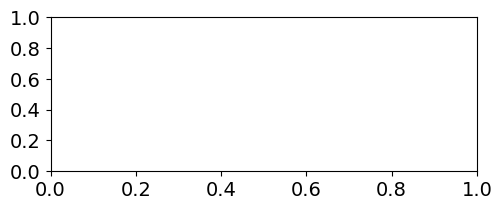

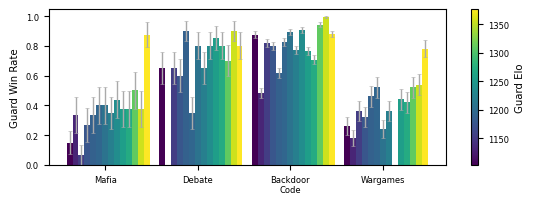

In [14]:
# Create a bar chart for AI models with contiguous bars within each category

fig, ax = plt.subplots(figsize=(5.5, 2))
# Here we allocate a total width of 1 per category.
group_width = 0.9
# Determine the bar width so that bars fill the entire group with no gaps.
bar_width = group_width / n_models
# Positions of each category on the x-axis (one per category)
positions = np.arange(4)

cmap = plt.cm.viridis
norm = plt.Normalize(min([ELO_LIST[i] for i in range(n_models)]), max([ELO_LIST[i] for i in range(n_models)]))



with plt.rc_context({
    'font.family': 'sans-serif',
    'font.size': 5,
    'axes.labelsize': 7.25,
    'axes.titlesize': 7.25,
    'xtick.labelsize': 6,
    'ytick.labelsize': 6,
    'legend.fontsize': 5.5,
}):
    fig, ax = plt.subplots(1, 1, figsize=(5.5, 2))
    # For each model, compute its bar positions within each category.
    # The left edge for each category group is at (positions - group_width/2).
    for i, model in enumerate(MODEL_LIST[:n_models]):
        # Bars start at (positions - 0.5) and then each bar is placed side by side.
        bar_positions = (positions + group_width/2) - i * bar_width
        # Retrieve mean values and standard errors for this model over the categories.
        values = [bar_plot_win_rate[game_id][i] for game_id in game_id_list]
        errors = [bar_plot_err[game_id][i] for game_id in game_id_list]
        color = cmap(norm(ELO_LIST[i]))
        print(values)
        
        ax.bar(
            bar_positions, 
            values, 
            width=bar_width, 
            label=model.split("/")[-1],
            color=color
        )
        ax.errorbar(
            bar_positions,
            values,
            yerr=errors,
            fmt='none',
            ecolor='#AAAAAA',
            capsize=1.5,
            elinewidth=1,
            capthick=0.4,
        )

    # Place the x-ticks at the center of each category group.
    ax.set_xticks(positions)
    ax.set_xticklabels([game_id_to_gamename_map[game_id] for game_id in game_id_list])
#    ax.set_xticklabels([letter_to_category[letter] for letter in categories], rotation=-24, ha='left')
    ax.set_ylabel('Guard Win Rate')

    # Add a colorbar to show ELO scores.
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = fig.colorbar(sm, ax=ax)
    cbar.set_label('Guard Elo')

    plt.tight_layout()
    plt.savefig('./figures/bar_plot.png', bbox_inches='tight')
    plt.savefig('./figures/bar_plot.pdf', bbox_inches='tight')
    plt.show()


Fitted row-players Elo: [200.24761724 176.61004693 108.22615542 181.18249422 200.25512434
 146.55193692  63.97085949 163.34019689 -92.63448731 142.51460066
 -68.44388678 -13.63158799 -73.83717504]
Fitted col-players Elo: [ -96.74462887 -104.13724582  -48.14134136  -35.02361708 -104.12559228
 -107.85467866  -58.19738186  -85.91532341  -82.39306654 -143.13121048
  -82.34552425 -104.12792573  -82.36424615]
Translating all Domain ELOs by 1226.6486220469988 to match General ELOs
Best model: linear
R²: 0.0136
COL MEAN Best Model Name: linear
COL MEAN Best-Fit Parameters: [0.04936115584058696, 1080.3983558810423]
              linear  AIC=-10.49,  SSR=4.26
    linear_upper_cut  AIC=-9.04,  SSR=4.09
    linear_lower_cut  AIC=-8.54,  SSR=4.25
     linear_both_cut  AIC=-7.96,  SSR=3.81
Best model: linear
R²: 0.5200
ROW MEAN Best Model Name: linear
ROW MEAN Best-Fit Parameters: [1.0983942546126946, -47.49890598669299]
              linear  AIC=16.46,  SSR=33.89
    linear_upper_cut  AIC=17.17,  S

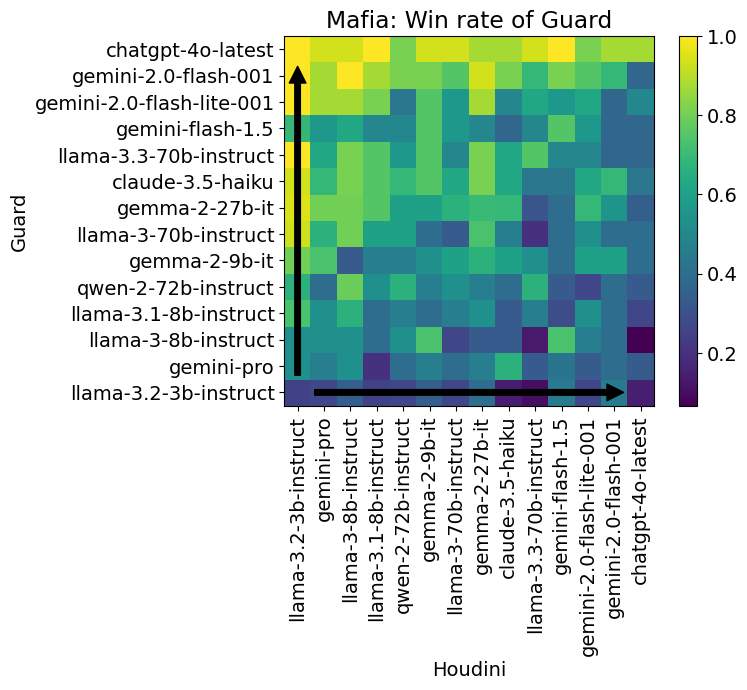

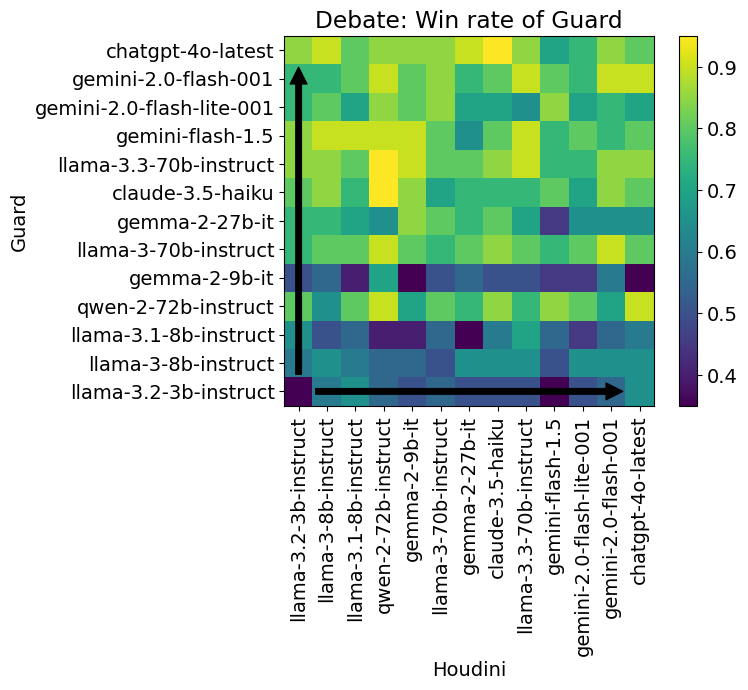

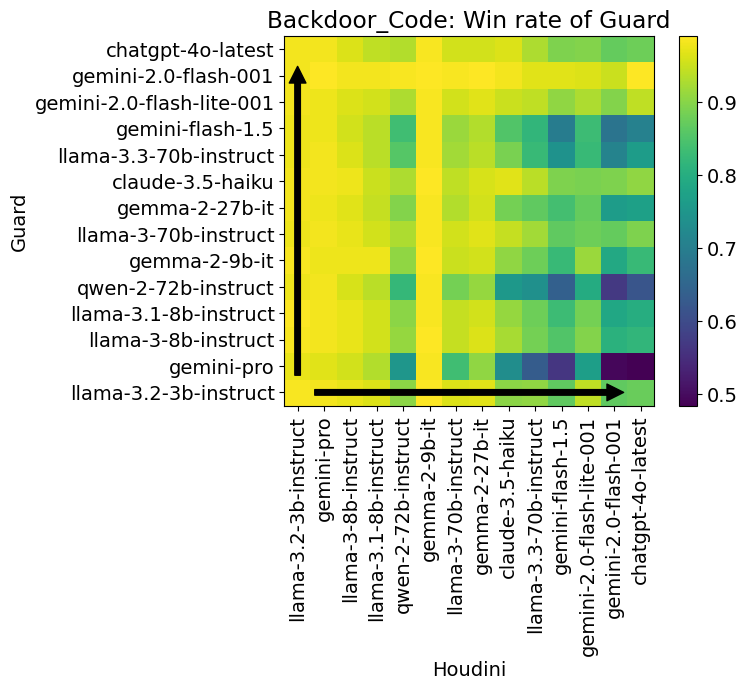

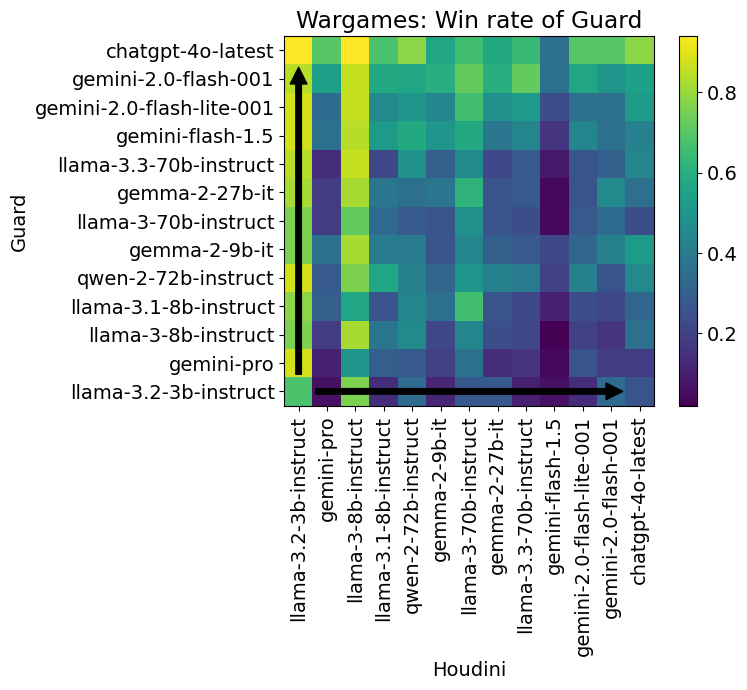

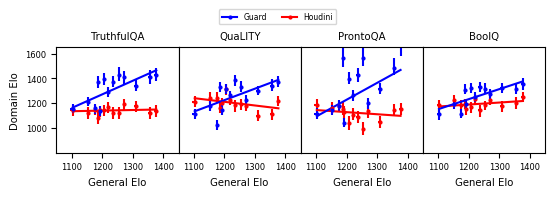

In [7]:
from elo_utils import *
import matplotlib.lines as mlines

game_id_to_gamename_map = {
    "mafia": "Mafia",
    "debate_truthfulqa": "TruthfulQA",
    "debate_quality": "QuaLITY",
    "debate_prontoqa": "ProntoQA",
    "debate_boolq": "BoolQ"
}

new_game_id_list = ["debate_truthfulqa", "debate_quality", "debate_prontoqa", "debate_boolq"]
with plt.rc_context({
    'font.family': 'sans-serif',
    'font.size': 5,
    'axes.labelsize': 7.25,
    'axes.titlesize': 7.25,
    'xtick.labelsize': 6,
    'ytick.labelsize': 6,
    'legend.fontsize': 5.5,
}):
    fig, axes = plt.subplots(1, 4, figsize=(5.5, 1.8), sharey=True, gridspec_kw={'wspace': 0})
    for i in range(4):
        game_id = new_game_id_list[i]
        win_rate, num_played = game_dict[game_id]
        row_elos, col_elos, row_mean, row_low, row_high,col_mean, col_low, col_high = get_elo_bounds(win_rate, num_played)  
        plot_elo_standard(row_mean, row_low, row_high, col_mean, col_low, col_high, collabel = 'Guard', rowlabel = 'Houdini', gamename = game_id_to_gamename_map[game_id], ax=axes[i], models_to_ignore=["gemini-pro"])
        #plot_win_matrix(win_rate, rowlabel = 'Guard', collabel = 'Houdini', gamename = game_id_to_gamename_map[game_id])
        if i > 0:
            axes[i].set_ylabel('')
            axes[i].tick_params(axis='y', which='both', length=0)
            
    guard_handle = mlines.Line2D([], [], color='blue', marker='o', linestyle='-', markersize=2, label='Guard')
    houdini_handle = mlines.Line2D([], [], color='red', marker='o', linestyle='-', markersize=2, label='Houdini')

    # Add a global legend to the figure.
    # loc, ncol, and bbox_to_anchor can be adjusted as needed.
    fig.legend(handles=[guard_handle, houdini_handle],
            loc='upper center',  # position within the figure
            ncol=2,              # number of columns in the legend
            bbox_to_anchor=(0.5, 1.05))  # adjust position above subplots

    # Adjust layout so nothing overlaps (especially important when adding a global legend)
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # leave space at the top for the legend

# Save the entire figure
fig.savefig('./figures/global_elo_debate.png', bbox_inches='tight')
fig.savefig('./figures/global_elo_debate.pdf', bbox_inches='tight')
plt.show()